# 뉴럴 네트워크 play ground 모방

모델이 성공하기 위해서
1. 폴리노미놀 특성 추가
2. 히든 레이어 추가

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
m = 500
x1 = np.random.rand(m) *12 -6
x2 = np.random.rand(m) *12 -6
X = np.stack((x1, x2), axis=1)
x1.max(), x1.min(), x2.max(), x2.min(), X.shape

(5.978475967007457,
 -5.979433464481703,
 5.984284514536142,
 -5.99686093177746,
 (500, 2))

In [28]:
# 라벨
y = np.sqrt(x1 ** 2 + x2 ** 2) < 4
np.mean(y)

0.332

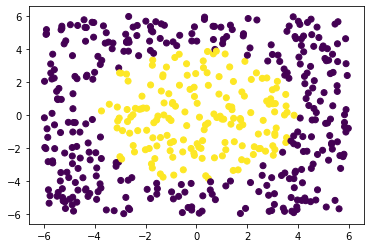

In [29]:
plt.scatter(x1, x2, c=y)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
model.score(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.668

In [31]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [32]:
xx = pf.fit_transform(X)
xx.shape, pf.get_feature_names()

((500, 6), ['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'])

In [35]:
# 다항특성을 추가하면 성공
# w를 보면, 차수가 높아질 수록 값이 커지고 중요도도 높아진다.
model = LogisticRegression().fit(xx, y)
model.score(xx, y), model.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.994, array([[ 3.94283596e+00, -2.90190246e-03,  7.60862465e-04,
         -5.15551117e-01,  4.50485158e-03, -4.93568420e-01]]))

문제의 난이도가 높아지면, 히든레이어를 추가해야한다.
X 특징 7개
Y : (0, 1)
Y = sigmoid(WX+b)

7개 x특성 -> 히든레이어 5개 -> 히든레이어 4개

X = (100, 7)
W1, b1 = (7, 5), (5)
    X * W1 = (100, 5) => 히든 레이어 1
W2, b2 = (5, 4), (4)
    히든1 * W2 = (100, 4) => 히든 레이어 2
W3, b3 = (4, 1), (1)
    히든2 * W3 = (100, 1) => 히든 레이어 2

## 히든레이어 1개(노드 5개) 추가

- 특성 : x1, x2
- 히든레이어 : 5
- 출력 : 1개 > sigmoid > 확률
- w1 : (2, 5)
- w2 : (5, 1)

In [58]:
X.shape, y.shape

((500, 2), (500, 1))

In [59]:
# y 이차원으로 변환
y = np.reshape(y, [-1, 1])
y.shape

(500, 1)

In [60]:
W1 = tf.Variable(tf.random_normal(shape=[2, 5])) ## x > hidden
b1 = tf.Variable(tf.random_normal(shape=[5]))
W2 = tf.Variable(tf.random_normal(shape=[5, 1])) ## hidden > h
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [61]:
hidden = tf.sigmoid(tf.matmul(tf.cast(X, tf.float32), W1)+b1)
out = tf.sigmoid(tf.matmul(hidden, W2)+b2)
ground_truth = tf.cast(y, tf.float32) #정답
cost = - tf.reduce_mean(y * tf.log(out) + (1-y) * tf.log(1-out))

In [76]:
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(ground_truth, tf.round(out)), tf.float32))

In [77]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [79]:
cost_list = []
accuracy_list = []

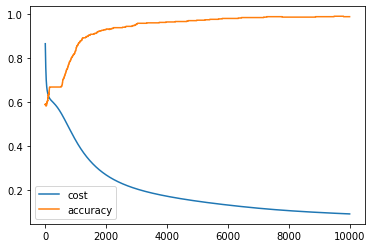

In [82]:
for i in range(10000):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()

## 1. 인구조사 연수입 5천만 이상(1), 이하(0) 분류
- sklearn로 히든없이 넣고 비교해서 히든 레이어 넣으면 성능이 올라가는지 확인

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [91]:
df = pd.read_csv('./datasets/adult/adult.data', header=None)
df.shape

(32561, 15)

In [96]:
df_valid = df.drop(columns=2)

In [101]:
x = df_valid.iloc[:, :-1]
y = df_valid.iloc[:, -1]
x.shape, y.shape

((32561, 13), (32561,))

In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
0     32561 non-null int64
1     32561 non-null object
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [104]:
x_dummy = pd.get_dummies(x)
x_dummy.shape

(32561, 107)

In [105]:
y_dummy = pd.get_dummies(y)
y_dummy.shape

(32561, 2)

In [107]:
y_dummy.head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [108]:
y_50k = y_dummy.iloc[:, 1]

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_dummy, y_50k)
model.score(x_dummy, y_50k)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8511716470624366

## 2. 인구조사 연수입 5천만 이상(1), 이하(0) 분류
- tensorflow로 히든없이 넣고 비교해서 히든 레이어 넣으면 성능이 올라가는지 확인

In [116]:
x_dummy.shape, y_50k.shape

((32561, 107), (32561,))

In [119]:
y_50k = np.array(y_50k)
y_50k = np.reshape(y_50k, [-1, 1])
y_50k.shape

(32561, 1)

In [124]:
W = tf.Variable(tf.random_normal(shape=[107, 1])) ## x > hidden
b = tf.Variable(tf.random_normal(shape=[1]))

out = tf.sigmoid(tf.matmul(tf.cast(x_dummy, tf.float32), W)+b)
ground_truth = tf.cast(y_50k, tf.float32) #정답
cost = -tf.reduce_mean(y_50k * tf.log(out) + (1-y_50k) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(ground_truth, tf.round(out)), tf.float32))

In [125]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

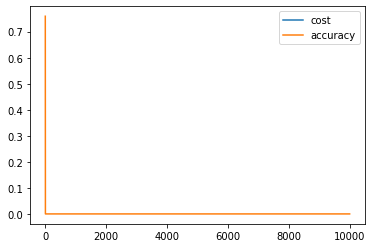

In [126]:
for i in range(10000):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()

## 3. 인구조사 연수입 5천만 이상(1), 이하(0) 분류
- tensorflow로 히든넣고 비교해서 히든 레이어 넣으면 성능이 올라가는지 확인

In [127]:
W1 = tf.Variable(tf.random_normal(shape=[107, 5])) ## x > hidden
b1 = tf.Variable(tf.random_normal(shape=[5]))
W2 = tf.Variable(tf.random_normal(shape=[5, 1])) ## hidden > h 
b2 = tf.Variable(tf.random_normal(shape=[1])) # 이진분류라서 1이라 했지만, 다중분류이면 k개 설정

In [130]:
x_dummy.shape

(32561, 107)

In [131]:
hidden = tf.sigmoid(tf.matmul(tf.cast(x_dummy, tf.float32), W1)+b1)
out = tf.sigmoid(tf.matmul(hidden, W2)+b2)
ground_truth = tf.cast(y_50k, tf.float32) #정답
cost = -tf.reduce_mean(y_50k * tf.log(out) + (1-y_50k) * tf.log(1-out))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(ground_truth, tf.round(out)), tf.float32))

In [132]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_list = []
accuracy_list = []

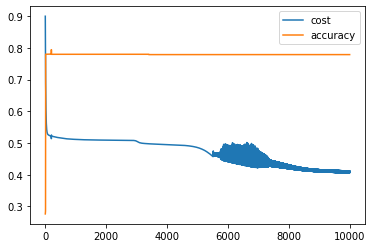

In [134]:
for i in range(10000):
    _, c, a = sess.run([train, cost, accuracy])
    cost_list.append(c)
    accuracy_list.append(a)
plt.plot(cost_list, label='cost')
plt.plot(accuracy_list, label='accuracy')
plt.legend()

## 3. 인구조사 연수입 5천만 이상(1), 이하(0) 분류
- tensorflow로 히든레이어 2개 넣고 비교해서 히든 레이어 넣으면 성능이 올라가는지 확인

네트워크가 깊다 = 히든 레이어가 많다.
네트워크가 넓다 = 히든 레이어에 노드가 많다.
대신 데이터가 많을 때는, 깊고 넓어질 수록 성능이 좋아집니다.
대신 데이터가 적을 때는, 깊고 넓어질 수록 오버피팅됩니다.